# Introducción a la Computación Científica con Python

Adaptado a partir de la versión original en inglés de [J.R. Johansson](http://jrjohansson.github.io/) (robert@riken.jp), por [G.F. Rubilar](https://gfrubi.github.io).

La última versión del original (en inglés) está disponible en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

In [1]:
%matplotlib notebook

## SymPy

# Introducción

[SymPy](http://sympy.org/en/index.html) es un módulo de matemática simbólica para Pytho. Tiene el objetivo de ofrecer un "sistema de álgebra computacional" (CAS) completo. SymPy está escrito completamente en Python.

Para comenzar a usar SymPy en un programa Python o en un notebook, importamos el módulo `sympy`:

In [2]:
import sympy as sp

Para que los resultados sean formateados en $\LaTeX$ podemos usar:

In [3]:
sp.init_printing()

## Variables simbólicas

En SymPy, los objetos fundamentales con los que trabajaremos son *símbolos* para las variables con las que deseamos realizar operaciones. Podemos crear un nuevo símbolo usando la clase `Symbol`:

In [4]:
x = sp.Symbol('x')

In [5]:
(sp.pi + x)**2

También podemos definir varios símbolos simultáneamente, usando la función `symbols`:

In [6]:
a, b, c = sp.symbols("a, b, c")

In [7]:
type(a)

sympy.core.symbol.Symbol

Podemos agregar algunas propiedades a los símbolos cuando son creados:

In [8]:
x = sp.Symbol('x', real=True)

In [9]:
x.is_imaginary

False

In [10]:
x = sp.Symbol('x', positive=True)

In [11]:
x > 0

### Números complejos

La unidad imaginaria es denotada por `I` en SymPy. 

In [12]:
2+3*sp.I

In [13]:
sp.I**2

In [14]:
(x*sp.I + 1)**2

### Números racionales

Existen tres tipos distintos de números en SymPy: `Real`, `Rational`, `Integer`: 

In [15]:
r1 = sp.Rational(4,5)
r2 = sp.Rational(5,4)

In [16]:
r1

In [17]:
r1 + r2

In [18]:
r1/r2

### Evaluación numérica

SymPy usa una librería para trabajar con números con precisión arbitraria, y tiene expresiones SymPy  predefinidas para varias constantes matemáticas, tales como: `pi`, `e` y `oo` para el infinito.

Para evaluar numéricamente una expresión podemos usar la función `evalf` (o bien `N`). Éstas usan un argumento `n` que especifíca el número de cifras significativas.

In [19]:
sp.pi.evalf(n=50)

In [20]:
y = (x + sp.pi)**2
y

In [21]:
sp.N(y, 5) # equivalente a evalf

Cuando evaluamos numéricamente expresiones a menudo deseamos substituir un símbolo por un valor numérico. En SymPy hacemos esto usando la función `subs`:

In [22]:
y.subs(x, 1.5)

La función `subs` también puede ser usada para substituir símbolos y expresiones:

In [23]:
y.subs(x, a+sp.pi)

## Manipulaciones algebráicas

Uno de los usos principales de un sistema de cálculo simbólico es realizar manipulaciones algebráicas de expresiones. Por ejemplo, si queremos expandir un producto, factorizar una expresión, o simplificar un resultado. En esta sección presentamos las funciones para realizar estas operaciones básicas en SymPy.

### Expand y factor

Primeros pasos en la manipulación algebráica

In [24]:
(x+1)*(x+2)*(x+3)

In [25]:
sp.expand((x+1)*(x+2)*(x+3))

La función `expand` acepta varios argumentos con los que se puede indicar qué tipo de expansión deseamos realizar. Por ejemplo, para expandir expresiones trigonométricas, usamos el argumento clave `trig=True`:

In [26]:
sp.sin(a+b)

In [27]:
sp.expand(sp.sin(a+b), trig=True)

Ver `help(expand)` para una descripción detallada de los distintos tipos de expansiones que la función `expand` puede realizar.

También podemos factorizar expresiones, usando la función `factor` de SymPy: 

In [28]:
sp.factor(x**3 + 6*x**2 + 11*x + 6)

### Simplify

La función `simplify` intenta simplificar una expresión usando distinta técnicas. Existen también alternativas más específicas a la función `simplify`: `trigsimp`, `powsimp`, `logcombine`, etc. 

El uso básico de estas funciones en el siguiente:

In [29]:
# simplify expande un producto
sp.simplify((x+1)*(x-1))

In [30]:
# simplify usa identidades trigonometricas
sp.simplify(sp.sin(a)**2 + sp.cos(a)**2)

In [31]:
sp.simplify(sp.sin(x)/sp.cos(x))

## apart and together

Podemos también manipular expresiones simbólicas que involucran fracciones usando las funciones `apart` y `together`. La primera de estas funciones separa una fracción en sus correspondientes fracciones parciales; la segunda hace todo lo contrario.

In [32]:
f1 = 1/((a+1)*(a+2))

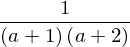

In [33]:
f1

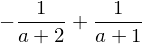

In [34]:
sp.apart(f1)

In [35]:
f2 = 1/(a+2) + 1/(a+3)

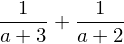

In [36]:
f2

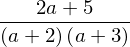

In [37]:
sp.together(f2)

### Sumas y productos

Podemos evaluar sumatorias y productos usando las funciones `Sum` y `Product`

In [38]:
n = sp.Symbol("n", integer=True)

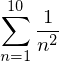

In [39]:
suma = sp.Sum(1/n**2, (n, 1, 10))
suma

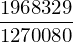

In [40]:
suma.doit()

In [41]:
suma.evalf()

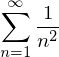

In [42]:
suma2 = sp.Sum(1/n**2, (n, 1, sp.oo))
suma2

In [43]:
suma2.evalf()

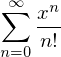

In [44]:
suma3 = sp.Sum(x**n/(sp.factorial(n)),(n,0,sp.oo))
suma3

In [45]:
suma3.doit()

Productos funcionan de manera similar:

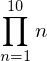

In [46]:
producto = sp.Product(n, (n, 1, 10)) # 10!
producto

In [47]:
producto.doit()

In [48]:
producto.evalf()

### Límites

SymPy permite evaluar límites usando la función `limit`. Por ejemplo, 

In [49]:
sp.limit(sp.sin(x)/x, x, 0)

También es posible calcular límites "por la derecha" y "por la izquierda" usando el argumento opcional `dir`:

In [50]:
sp.limit(1/x, x, 0, dir="+")

In [51]:
sp.limit(1/x, x, 0, dir="-")

## Cálculo

Además de realizar manipulaciones algebráicas, SimPy puede realizar operaciones de cálculo, tales como derivar y derivar expresiones.

### Derivación

Derviar es usualmente algo simple. Usamos la función `diff`. El primer argumento es una expresión que será derivada, y el segundo argumento es el símbolo respecto al cual se realizará la derivada:

In [52]:
y**2

In [53]:
sp.diff(y**2, x)

Para calcular derivadas de orden superior podemos usar:

In [54]:
sp.diff(y**2, x, x)

o bien

In [55]:
sp.diff(y**2, x, 2) # hace lo mismo

Podemos calcular la derivada de una expresión que depende de más de una variable:

In [56]:
x, y, z = sp.symbols("x,y,z")

In [57]:
f = sp.sin(x*y) + sp.cos(y*z)

Entonces, la dervidada 

$$
\frac{\partial^3f}{\partial x\partial y^2},
$$
puede calcularse como

In [58]:
sp.diff(f, x, 1, y, 2)

### Integración

La integración se realiza de forma similar:

In [59]:
f = x*sp.sin(x)

In [60]:
sp.integrate(f, x)

También podemos evaluar integrales definidas, agregando la información de los límites de integración:

In [61]:
sp.integrate(f, (x, -sp.pi, sp.pi))

Esto incluye el caso en que los límites son infinitos

In [62]:
sp.integrate(sp.exp(-x**2), (x, -sp.oo, sp.oo))

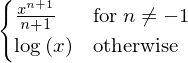

In [63]:
n = sp.Symbol('n', int=True)
resultado = sp.integrate(x**n,x)
resultado

Como vemos, `oo` (np.oo) es el objeto que en SymPy simboliza el infinito.

# Series

SymPy puede realizar expansiones en series de una expresión, usando la función `series`:

## Series de Fourier

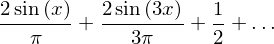

In [64]:
sp.fourier_series(sp.Heaviside(x))

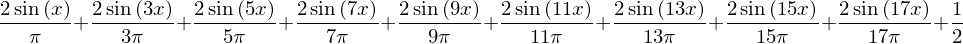

In [65]:
sp.fourier_series(sp.Heaviside(x)).truncate(10)

### Transformada de Fourier

In [66]:
f = sp.DiracDelta(x-a)
f

In [67]:
k = sp.Symbol('k', real=True)
sp.fourier_transform(f,x,k)

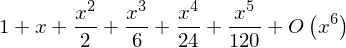

In [68]:
sp.series(sp.exp(x), x)

Por defecto, la expansión se realiza en torno a cero ($x=0$), pero podemos también expandir en torno a otro valor, incluyéndolo en los argumentos de la función:

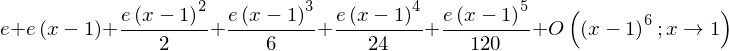

In [69]:
sp.series(sp.exp(x), x, 1)

Además podemos definir explícitamente el orden hasta el que se realiza la expansión:

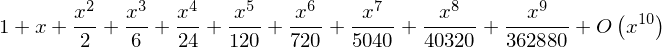

In [70]:
sp.series(sp.exp(x), x, 0, 10)

La función `series` define un tipo especial de objeto en SymPy (sympy.core.add.Add) que incluye la información del orden hasta el que se ha realizado la expansión. Esto es útil para llevar el registro de estos órdenes en un cálculo:

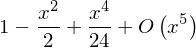

In [71]:
s1 = sp.cos(x).series(x, 0, 5)
s1

In [72]:
s2 = sp.sin(x).series(x, 0, 2)
s2

In [73]:
sp.expand(s1 * s2)

Si queremos eliminar la información del orden de expansión y sólo quedarnos con los términos calculados, podemos usar el método `removeO`:

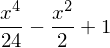

In [74]:
s1.removeO()

## Funciones especiales

Ver [documentación](https://docs.sympy.org/latest/modules/functions/special.html)

### Polinomios de Legendre

In [75]:
sp.legendre(1,x)

In [76]:
for n in range(10):
    print(sp.legendre(n,x))

1
x
3*x**2/2 - 1/2
5*x**3/2 - 3*x/2
35*x**4/8 - 15*x**2/4 + 3/8
63*x**5/8 - 35*x**3/4 + 15*x/8
231*x**6/16 - 315*x**4/16 + 105*x**2/16 - 5/16
429*x**7/16 - 693*x**5/16 + 315*x**3/16 - 35*x/16
6435*x**8/128 - 3003*x**6/32 + 3465*x**4/64 - 315*x**2/32 + 35/128
12155*x**9/128 - 6435*x**7/32 + 9009*x**5/64 - 1155*x**3/32 + 315*x/128


In [77]:
J1 = sp.besselj(1,x)
J1

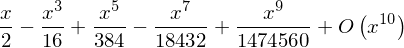

In [78]:
J1.series(x,0,10)

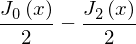

In [79]:
J1.diff(x)

<IPython.core.display.Javascript object>


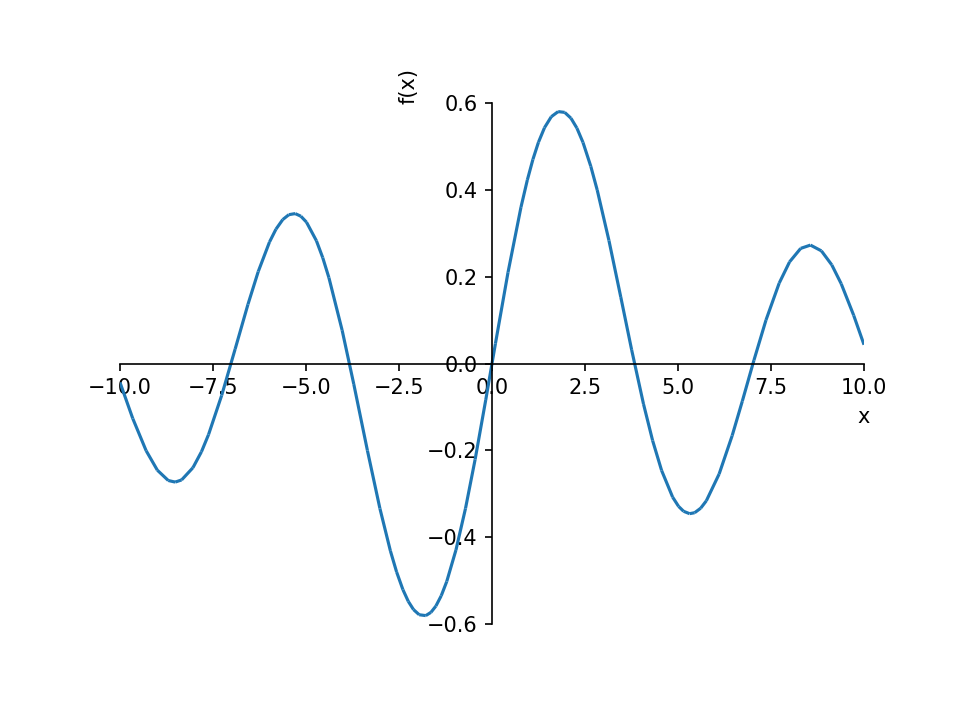

In [80]:
sp.plot(J1)

In [81]:
th, ph = sp.symbols('theta, varphi', real=True, positive=True)

In [82]:
sp.Ynm(1,1,th,ph)

In [83]:
sp.Ynm(1,1,th,-ph)

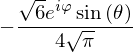

In [84]:
sp.Ynm(1,1,th,ph).expand(func=True)

In [85]:
H = sp.Heaviside(x)
H

<IPython.core.display.Javascript object>


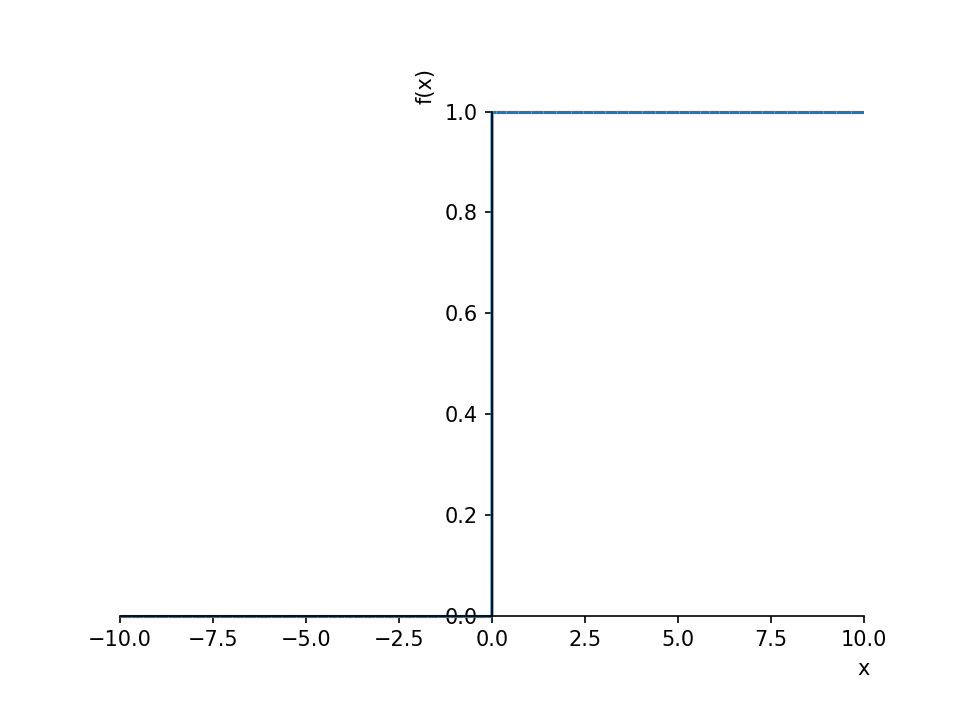

In [86]:
sp.plot(H)

In [87]:
sp.diff(H,x)

## Álgebra lineal

### Matrices

En SymPy podemos usar la clase `Matrix` para definir matrices:

In [88]:
v1, v2 = sp.symbols("v_1, v_2")
alpha, beta =  sp.symbols('alpha, beta', real=True)

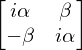

In [89]:
A = sp.Matrix([[sp.I*alpha, beta],[-beta, sp.I*alpha]])
A

In [90]:
v = sp.Matrix([[v1], [v2]])
v

La clase `Matrix` nos permite realizar las usuales operaciones matriciales:

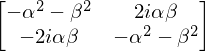

In [91]:
A**2 # note la diferencia con lo que hace si A fuese un arreglo de Numpy

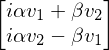

In [92]:
A * v

In [93]:
sp.det(A), A.det()

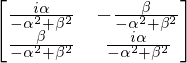

In [94]:
A.inv()

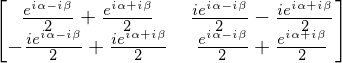

In [95]:
sp.exp(A)

## Solución de (sistemas de) ecuaciones

Podemos solucionar (sistemas de) ecuaciones por medio de la función `solve`:

In [96]:
sp.solve(x**2 - 1, x)

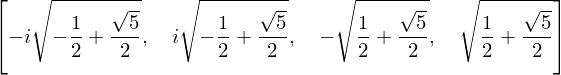

In [97]:
sp.solve(x**4 - x**2 - 1, x)

### Sistemas de ecuaciones:

In [98]:
sp.solve([x + y - 1, x - y - 1], [x,y])

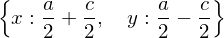

In [99]:
sp.solve([x + y - a, x - y - c], [x,y])

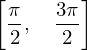

In [100]:
sp.solve(sp.cos(x),x)

# Ecuaciones diferenciales

In [101]:
y = sp.Function('y')(x)

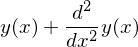

In [102]:
eq = y.diff(x,2)+y
eq

In [103]:
sp.dsolve(eq)

## Lectura adicional

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.
